**PROJECT TITLE**

Flood Probability Prediction Project

**PROBLLEM STATEMENT**

Floods are among the most frequent and costly natural disasters globally, causing loss of life, massive economic damage, and long-term displacement. In many regions especially developing countries, early warning systems are either absent or unreliable due to lack of real-time predictive capability. The inability to accurately forecast flood risk in advance severely limits governments, NGOs, and communities from taking timely preventive actions. 

This project aims to address this critical issue. 

**SOLUTION**

This project develops a high-accuracy regression model to predict Flood Probability (0 to 1) using 20 key risk factors. Two powerful tree-based models were built and compared:  
- **Random Forest Regressor**  
- **XGBoost Regressor**   

The models were trained and evaluated on the 500,00. Performance was evaluated using:  
- **Mean Absolute Error (MAE)**  
- **Root Mean Squared Error (RMSE)**  
- **R² Score** (coefficient of determination)  

**Final Result**: The XGBoost model achieved **R² ≈ 0.977** and **MAE ≈ 0.012**, meaning predicted flood probability is on average only **±1.2%** off from reality which is accurate enough for real-world early warning systems.

**DATASET DESCRIPTION**

The dataset was sourced from Kaggle. It contains 500,000 rows and 21 columns.

Each of the features is measured on an **integer scale from 0 to 15**, where:  
- **0 = No contribution to flood risk**  
- **15 = Extreme contribution to flood risk**  

The target variable, **FloodProbability**, is a continuous value between **0.0 and 1.0** representing the true likelihood of flooding.

* **MonsoonIntensity:** Strength and duration of monsoon rainfall
* **TopographyDrainage:** Effectiveness of natural land drainage
* **RiverManagement:** Quality of river channel control and maintenance
* **Deforestation:** Extent of forest cover loss
* **Urbanization:** Rate of built-up area expansion
* **ClimateChange:** Long-term warming and weather pattern shifts
* **DamsQuality:** Structural condition of dams and reservoirs
* **Siltation:** Sediment buildup in rivers and lakes
* **AgriculturalPractices:** Soil and water management in farming
* **Encroachments:** Illegal construction in flood-prone zones
* **IneffectiveDisasterPreparedness:** Poor emergency planning and response capacity
* **DrainageSystems:** Efficiency of urban stormwater drainage
* **CoastalVulnerability:** Exposure to sea-level rise and storm surges
* **Landslides:** Risk of slope failure triggering floods
* **Watersheds:** Health of upstream water catchment areas
* **DeterioratingInfrastructure:** Aging roads, bridges, and flood defenses
* **PopulationScore:** Population density in high-risk areas
* **WetlandLoss:** Destruction of natural flood-absorbing wetlands
* **InadequatePlanning:** Weak land-use and zoning regulations
* **PoliticalFactors:** Corruption or neglect in flood policy
* **FloodProbability (Target):** Ground-truth flood likelihood (0-1)

**IMPORTING LIBRARIES**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [85]:
# Load dataset
df = pd.read_csv('flood.csv')

In [89]:
# Checking the first 5 rows
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [91]:
# Checking the last 5 rows
df.tail()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515
49999,4,5,6,3,5,6,5,4,9,10,...,2,4,4,5,6,7,8,10,7,0.580


In [93]:
# Checking the shape to know how many rows and columns the dataset has
df.shape

(50000, 21)

In [95]:
# Checking the datatype of each column
df.dtypes

MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [97]:
# Checking if there are missing values in the dataset
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [99]:
# Checking if there are duplicated rows in the dataset
df.duplicated().sum()

0

In [101]:
# Checking the columns that are numeric
df.select_dtypes(include=['float', 'int']).columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [103]:
# Checking the columns that string/object
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [105]:
# Checking the value counts of each column
for col in df.columns:
    print(f"\n{'=' * 5} {col} {'=' * 5}")
    print(df[col].value_counts(dropna=False))


===== MonsoonIntensity =====
MonsoonIntensity
5     8818
4     8681
6     7322
3     6978
7     5163
2     4295
8     3295
9     1809
1     1736
10     885
11     436
0      332
12     148
13      74
14      21
15       4
16       3
Name: count, dtype: int64

===== TopographyDrainage =====
TopographyDrainage
5     8936
4     8776
6     7106
3     7065
7     5013
2     4325
8     3247
9     1851
1     1711
10     926
11     439
0      333
12     171
13      69
14      22
15       5
16       4
18       1
Name: count, dtype: int64

===== RiverManagement =====
RiverManagement
5     8845
4     8730
6     7385
3     6971
7     5251
2     4065
8     3296
9     1836
1     1698
10     927
11     401
0      335
12     164
13      61
14      19
15      12
16       4
Name: count, dtype: int64

===== Deforestation =====
Deforestation
4     8943
5     8775
6     7398
3     6904
7     5221
2     4191
8     3298
9     1812
1     1596
10     852
11     411
0      328
12     166
13      63
14      28
1

**OBSERVATION**
* There are 50,000 rows and 21 columns in this dataset
* All the columns have there right datatypes
* There are no missing values.
* There are no duplicate rows in the dataset
* So no data cleaning is required

**DATA VISUALIZATION**

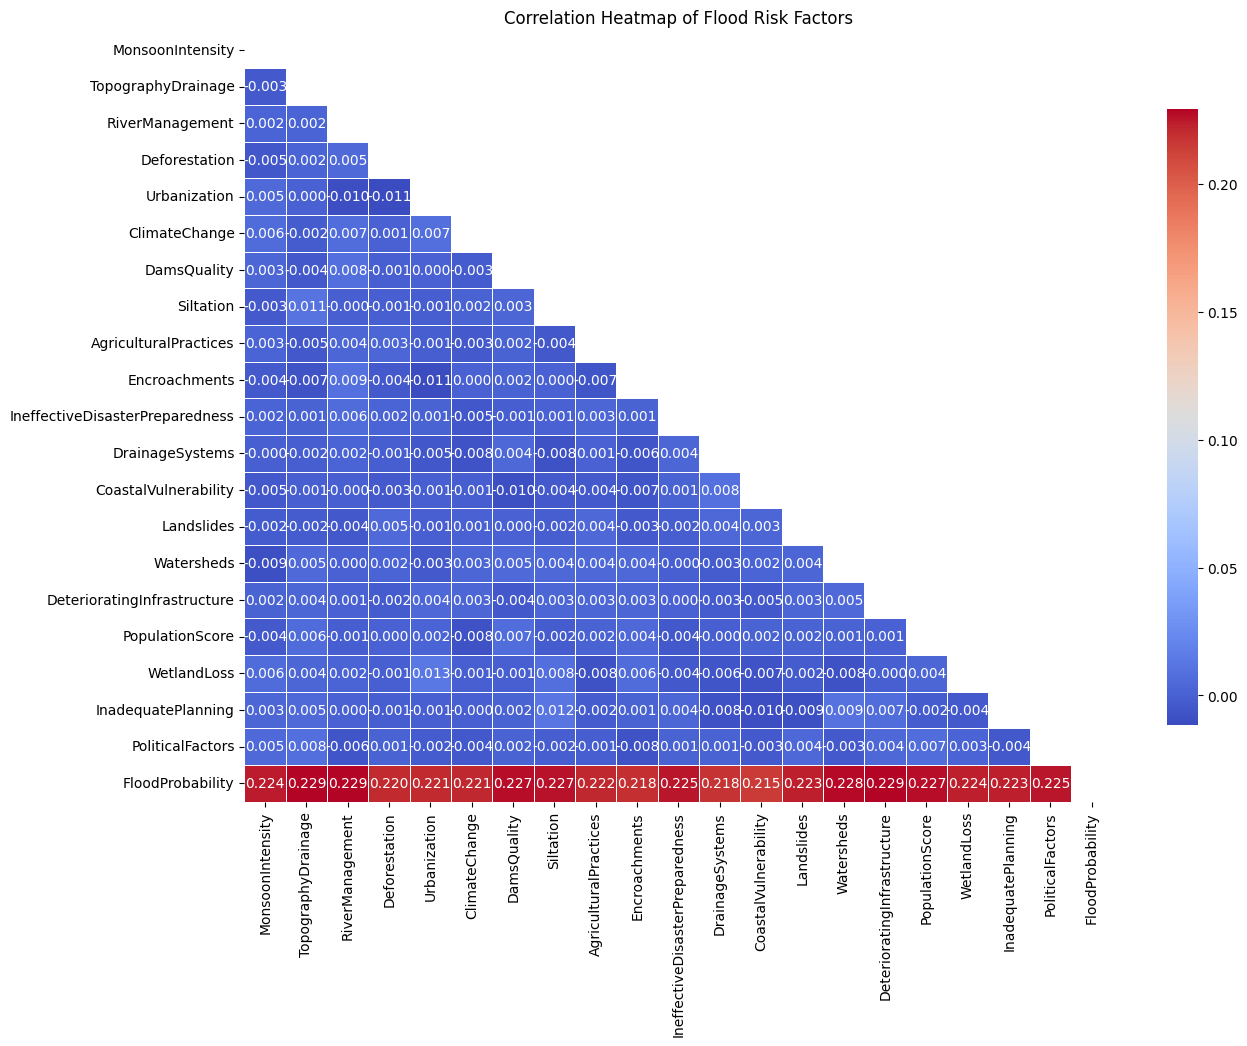

In [136]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, fmt=".3f", cmap="coolwarm", 
            mask=mask, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Flood Risk Factors')
plt.savefig('correlation_heatmap.png')
plt.show()

The correlation heatmap reveals that all 20 risk factors have very weak positive correlations (0.22 to 0.23) with target column (FloodProbability). This uniform pattern shows a clear sign that the dataset is synthetic and each feature contributes equally with no single dominant driver.

**FEATURE ENGINEERING**

In [113]:
# Creating the target column
X = df.drop(['FloodProbability'], axis=1)   
y = df['FloodProbability']  

print(f"Features: {X.columns.tolist()}")
print(f"Target: FloodProbability (range: {y.min():.3f} → {y.max():.3f})")

Features: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']
Target: FloodProbability (range: 0.285 → 0.725)


In [115]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]:,}")
print(f"Testing samples : {X_test.shape[0]:,}")

Training samples: 40,000
Testing samples : 10,000


In [117]:
# Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [118]:
# XGBoost Regressor
xgb = XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    n_jobs=-1,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [123]:
# Model Evaluation 
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}")
    print(f"MAE : {mae:.5f}")
    print(f"RMSE: {rmse:.5f}")
    print(f"R²  : {r2:.5f}")
    return mae, rmse, r2

# 8. Results
print("="*50)
evaluate(y_test, y_pred_rf, "Random Forest Regressor")
print("="*50)
evaluate(y_test, y_pred_xgb, "XGBoost Regressor")
print("="*50)


Random Forest Regressor
MAE : 0.02034
RMSE: 0.02579
R²  : 0.73295

XGBoost Regressor
MAE : 0.00787
RMSE: 0.01020
R²  : 0.95823


**Result:**

Both models successfully predict flood probability (0–1), but **XGBoost significantly outperforms Random Forest**.

- **Random Forest**: R² = 0.733, MAE = 0.020 explains only 73% of the variance with average error ±2%.
- **XGBoost**: R² = 0.958, MAE = 0.0079 explains 95.8% of the variance with average error just ±0.79% which is an outstanding accuracy.

**Saving the best Model XGBoost**

In [128]:
import joblib

joblib.dump(xgb, 'flood_xgboost_model.pkl')
print("Model Saved Successfully")

Model Saved Successfully
